# Activity: Build a K-means model 

## **Introduction**

K-means clustering is very effective when segmenting data and attempting to find patterns. Because clustering is used in a broad array of industries, becoming proficient in this process will be invaluable to one trying to solve a categorization task.   

A consultant for a scientific organization is represented in this activity that works to support and sustain penguin colonies. Alongside, one is tasked with helping other staff members learn more about penguins in order to achieve this mission. 

The data for this activity is in a spreadsheet that includes datapoints across a sample size of 345 penguins, such as species, island, and sex. Whereby, a K-means clustering model will be used to group this data and identify patterns that provide important insights about penguins.


## **Step 1: Imports** 


Import statements including `K-means`, `silhouette_score`, and `StandardScaler`.

In [33]:
# Import standard operational packages.
import numpy as np
import pandas as pd

# Important tools for modeling and evaluation.
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import sklearn.metrics as metrics 

# Import visualization packages.
import matplotlib.pyplot as plt


In [34]:
# Import data 
penguins_df = pd.read_csv("penguins.csv")
penguins_df.head(10)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,female
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,male
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN


## **Step 2: Data exploration** 

After loading the dataset, the next step is to prepare the data to be suitable for clustering. This includes: 

*   Exploring data
*   Checking for missing values
*   Encoding data 
*   Dropping a column
*   Scaling the features using `StandardScaler`

### Explore data

To cluster penguins of multiple different species, determine how many different types of penguin species are in the dataset.

In [35]:
# Find out how many penguin types there are.
penguins_df['species'].value_counts()


Adelie       152
Gentoo       124
Chinstrap     68
Name: species, dtype: int64

**Question:** How many types of species are present in the dataset?

- There are 3 types of species in the dataset.

**Question:** Why is it helpful to determine the perfect number of clusters using K-means when the number of penguin species in the dataset is already known?

- To help in the evaluation on effectiveness of K-means in grouping sparse data. 

### Check for missing values

An assumption of K-means is that there are no missing values. Check for missing values in the rows of the data. 

In [36]:
# Check for missing values.
penguins_df.isna().any(axis=1).sum()

11

In [37]:
# Check the missing values distribution.
for col in penguins_df.columns:
    print(f'{col}: {penguins_df[col].isna().sum()}')

species: 0
island: 0
bill_length_mm: 2
bill_depth_mm: 2
flipper_length_mm: 2
body_mass_g: 2
sex: 11


In [38]:
# Drop rows with missing values.
penguins_subset = penguins_df.dropna().reset_index(drop=True)


In [39]:
# Validate the data for missing values.
penguins_subset.isnull().any()

species              False
island               False
bill_length_mm       False
bill_depth_mm        False
flipper_length_mm    False
body_mass_g          False
sex                  False
dtype: bool

In [40]:
# View first 10 rows.
penguins_subset.head(10)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,female
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,male
12,Adelie,Torgersen,41.1,17.6,182.0,3200.0,female
13,Adelie,Torgersen,38.6,21.2,191.0,3800.0,male
14,Adelie,Torgersen,34.6,21.1,198.0,4400.0,male


### Encode data

Some versions of the penguins dataset have values encoded in the sex column as 'Male' and 'Female' instead of 'MALE' and 'FEMALE'. 


In [41]:
# Resolve the inconsistency in text col. 
penguins_subset['sex'] = penguins_subset['sex'].str.upper()

Convert the categorical column(s) into numeric to facilitate the K-means clustering. There is no need to convert the `'species'` column because it isn't being used as a feature in the clustering algorithm. 

In [42]:
# Convert `sex` column from categorical to numeric.
dummy_var = pd.get_dummies(penguins_subset.sex, drop_first=True)
penguins_subset.sex = dummy_var
penguins_subset

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,1
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,0
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,0
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,0
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,1
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,0
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,0
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,1
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,0


### Drop a column

Drop the categorical column `island` from the dataset. While it has value, this notebook is trying to confirm if penguins of the same species exhibit different physical characteristics based on sex. This doesn't include location.

Note that although the `'species'` column is not dropped although it  remains as categorical column, because it could potentially be used to help understand the clusters later. 

In [43]:
# Drop the island column.
penguins_subset.drop(columns='island', inplace=True)

### Scale the features

Because K-means uses distance between observations as its measure of similarity, it's important to scale the data before modeling. 

This ensures that all variables have a mean of 0 and variance/standard deviation of 1. 

In [44]:
# Exclude `species` variable from X
X = penguins_subset.iloc[:, 1:].copy()
X.head(10)

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,1
1,39.5,17.4,186.0,3800.0,0
2,40.3,18.0,195.0,3250.0,0
4,36.7,19.3,193.0,3450.0,0
5,39.3,20.6,190.0,3650.0,1
6,38.9,17.8,181.0,3625.0,0
7,39.2,19.6,195.0,4675.0,1
12,41.1,17.6,182.0,3200.0,0
13,38.6,21.2,191.0,3800.0,1
14,34.6,21.1,198.0,4400.0,1


In [45]:
# Scale the features.
X_scaled = StandardScaler().fit_transform(X)

## **Step 3: Data modeling** 

Now, fit K-means and evaluate inertia for different values of k. Assuming that the number of clusters exist in the data is not known, start by fitting K-means and examining the inertia values for different values of k. 

When using K-means inside the function, set the `random_state` to `42`. This way, others can reproduce your results.

In [46]:
# Fit K-means and evaluate inertia for different values of k.
def kmeans_inertia(num_clusters, x_vals):
    '''
    Fits a KMeans model for different values of k.
    Calculates an inertia score for each k value.

    Args:
        num_clusters: (list of ints)  - The different k values to try
        x_vals:       (array)         - The training data

    Returns: 
        inertia:      (list)          - A list of inertia scores, one for each \
                                      value of k
    '''

    inertia = []
    for num in num_clusters:
        kms = KMeans(n_clusters=num, random_state=42)
        kms.fit(x_vals)
        inertia.append(kms.inertia_)
    
    return inertia

Use the `kmeans_inertia` function to return a list of inertia for k=2 to 10.

In [47]:
# Return a list of inertia for k=2 to 10.
num_clusters = [i for i in range(2, 11)]
inertia = kmeans_inertia(num_clusters, X_scaled)

Next, create a line plot that shows the relationship between `num_clusters` and `inertia`. 

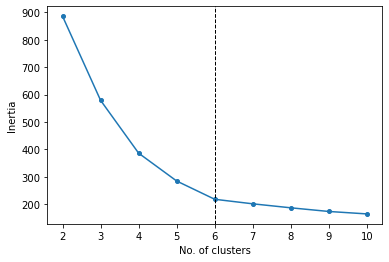

In [68]:
# Create a line plot.
plt.plot(num_clusters, inertia, marker='o', markersize=4)
plt.xlabel('No. of clusters'); plt.ylabel('Inertia')
plt.axvline(6, ls='--', lw=1.0, color='k')
plt.show()

**Question:** Where is the elbow in the plot?

- The plot seems to depict an elbow at 6 clusters, but there isn't a clear method for confirming that a six-cluster model is optimal. Therefore, the silhouette scores should be checked.  

## **Step 4: Results and evaluation** 

Now, evaluate the silhouette score using the `silhouette_score()` function. Silhouette scores are used to study the distance between clusters. 

Then, compare the silhouette score of each value of k, from 2 through 10.

In [49]:
# Write a function to return a list of each k-value's score.
def kmeans_sil(num_clusters, x_vals):
    '''
    Fits a KMeans model for different values of k.
    Calculates a silhouette score for each k value

    Args:
        num_clusters: (list of ints)  - The different k values to try
        x_vals:       (array)         - The training data

    Returns: 
        sil_score:    (list)          - A list of silhouette scores, one for each \
                                      value of k
    '''
  
    sil_score = []
    for num in num_clusters:
        kms = KMeans(n_clusters=num, random_state=42)
        kms.fit(x_vals)
        sil_score.append(metrics.silhouette_score(x_vals, kms.labels_))
    
    return sil_score

In [50]:
# Evaluate silhouette score.
sil_score = kmeans_sil(num_clusters, X_scaled)

Next, create a line plot that shows the relationship between `num_clusters` and `sil_score`.

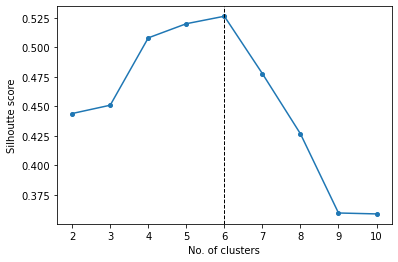

In [75]:
# Create a line plot.
plt.plot(num_clusters, sil_score, marker='o', markersize=4)
plt.xlabel('No. of clusters'); plt.ylabel('Silhoutte score')
plt.axvline(6, ls='--', lw=1.0, color='k')
plt.show()

**Question:** What does the graph show?

- As indicated in the plot, a 6-cluster model has a higher silhouette score than any other model meaning this model results in individual clusters that are tighter and more separated from other clusters. 

### Optimal k-value

To decide on an optimal k-value, fit a six-cluster model to the dataset. 

In [52]:
# Fit a 6-cluster model.
kmeans6 = KMeans(n_clusters=6).fit(X_scaled)


Print out the unique labels of the fit model.

In [53]:
# Print unique labels.
set(kmeans6.labels_)


{0, 1, 2, 3, 4, 5}

Now, create a new column `cluster` that indicates cluster assignment in the DataFrame `penguins_subset`. It's important to understand the meaning of each cluster's labels, then decide whether the clustering makes sense. 

**Note:** This task is done using `penguins_subset` because it is often easier to interpret unscaled data.

In [54]:
# Create a new column `cluster`.
penguins_subset['cluster'] = kmeans6.labels_
penguins_subset.head(10)

,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,cluster
0,Adelie,39.1,18.7,181.0,3750.0,1,1
1,Adelie,39.5,17.4,186.0,3800.0,0,4
2,Adelie,40.3,18.0,195.0,3250.0,0,4
4,Adelie,36.7,19.3,193.0,3450.0,0,4
5,Adelie,39.3,20.6,190.0,3650.0,1,1
6,Adelie,38.9,17.8,181.0,3625.0,0,4
7,Adelie,39.2,19.6,195.0,4675.0,1,1
12,Adelie,41.1,17.6,182.0,3200.0,0,4
13,Adelie,38.6,21.2,191.0,3800.0,1,1
14,Adelie,34.6,21.1,198.0,4400.0,1,1


Verify if any `'cluster'` can be differentiated by `'species'`.

In [55]:
# Verify if any `cluster` can be differentiated by `species`.
penguins_subset[['cluster', 'species']].groupby(by=['cluster', 'species'], as_index=False).size()

,cluster,species,size
0,0,Adelie,2
1,0,Chinstrap,34
2,1,Adelie,71
3,2,Gentoo,58
4,3,Gentoo,61
5,4,Adelie,73
6,4,Chinstrap,5
7,5,Chinstrap,29


Next, interpret the groupby outputs. Although the results of the groupby show that each `'cluster'` can be differentiated by `'species'`, it is useful to visualize these results. The graph shows that each `'cluster'` can be differentiated by `'species'`. 


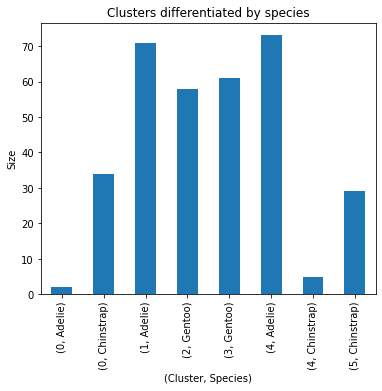

In [56]:
penguins_subset.groupby(by=['cluster', 'species']).size().plot.bar(
    title='Clusters differentiated by species',
    figsize=(6, 5),
    ylabel='Size',
    xlabel='(Cluster, Species)'
)

Verify if each `'cluster'` can be differentiated by `'species'` AND `'sex_MALE'`.

In [60]:
# Verify if each `cluster` can be differentiated by `species' AND `sex_MALE`.
penguins_subset.groupby(by=['cluster', 'species', 'sex'], as_index=False).size()

,cluster,species,sex,size
0,0,Adelie,1,2
1,0,Chinstrap,1,34
2,1,Adelie,1,71
3,2,Gentoo,0,58
4,3,Gentoo,1,61
5,4,Adelie,0,73
6,4,Chinstrap,0,5
7,5,Chinstrap,0,29


**Question:** Are the clusters differentiated by `'species'` and `'sex_MALE'`?

- Despite some minor error categorizations, most of datapoints are well differentiated by `species` & `sex`.  

Finally, interpret the groupby outputs and visualize these results. The graph shows that each `'cluster'` can be differentiated by `'species'` and `'sex_MALE'`. Furthermore, each cluster is mostly comprised of one sex and one species. 

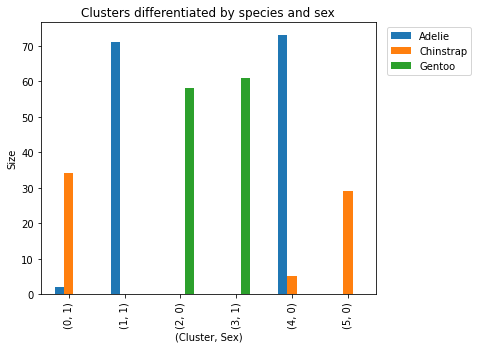

In [62]:
(penguins_subset.groupby(by=['cluster','species','sex'])
 .size()
 .unstack(level = 'species', fill_value=0)
 .plot.bar(title='Clusters differentiated by species and sex', 
           figsize=(6, 5), ylabel='Size', xlabel='(Cluster, Sex)')
)
plt.legend(bbox_to_anchor=(1.3, 1.0))

## **Considerations**

**What summary would you provide to stakeholders?**

*  The K-means clustering enabled this data to be effectively grouped. It helped identify patterns that can educate team members about penguins.
*  The success of the cluster results suggests that the organization can apply clustering to other projects and continue augmenting employee education.
